# Name:Prakhar Nagpal

# Reg Number: RA1911033010050

# Topic: Tokyo Olympic Medal Data Exploration

In [149]:
%matplotlib inline

from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd

#plt.rcParams['figure.figsize'] = [16, 7]

In [96]:

df = pd.read_csv('https://raw.githubusercontent.com/PrakharNagpal/StockExchangeData/main/Tokyo%20Medals%202021.csv?token=AM25EWR5YCN2YJWI75HLFJ3BG3TJC')

df.head(95)


,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3
...,...,...,...,...,...,...
88,Ghana,0,0,1,1,77
89,Grenada,0,0,1,1,77
90,Kuwait,0,0,1,1,77
91,Republic of Moldova,0,0,1,1,77


In [53]:
df.dtypes


Country          object
Gold Medal        int64
Silver Medal      int64
Bronze Medal      int64
Total             int64
Rank By Total     int64
dtype: object

In [54]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        93 non-null     object
 1   Gold Medal     93 non-null     int64 
 2   Silver Medal   93 non-null     int64 
 3   Bronze Medal   93 non-null     int64 
 4   Total          93 non-null     int64 
 5   Rank By Total  93 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.5+ KB


In [55]:

df.memory_usage()

Index            128
Country          744
Gold Medal       744
Silver Medal     744
Bronze Medal     744
Total            744
Rank By Total    744
dtype: int64

In [56]:

df.memory_usage().sum()

4592

In [57]:
df.describe()

,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,3.655914,3.634409,4.322581,11.612903,43.494624
std,7.022471,6.626339,6.210372,19.091332,24.171769
min,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,2.000000,23.000000
50%,1.000000,1.000000,2.000000,4.000000,47.000000
75%,3.000000,4.000000,5.000000,11.000000,66.000000
max,39.000000,41.000000,33.000000,113.000000,77.000000


#### Statistical moments

1. Mean (1st moment)
2. Variance (2nd moment)
3. Skewness (3rd moment)
4. Kurtosis (4th moment)


In [58]:
df.mean()

Gold Medal        3.655914
Silver Medal      3.634409
Bronze Medal      4.322581
Total            11.612903
Rank By Total    43.494624
dtype: float64

In [61]:
df['Total'].mean()

11.612903225806452

In [62]:
df['Bronze Medal'].mean()

4.32258064516129

In [63]:
df.var()

Gold Medal        49.315101
Silver Medal      43.908368
Bronze Medal      38.568724
Total            364.478962
Rank By Total    584.274427
dtype: float64

#### Skewness

Skewness is the measure of the symmetry of a distribution compared to standard normal distribution

 - +ive - right skewed (mean is to the right of mode/median). Long tail in the +ive direction.
 - 0 - symmetric
 - -ive - left skewed (mean is to the left of mode/median). Long tail in the -ive direction.

In [64]:
df.skew()

Gold Medal       3.517520
Silver Medal     3.672700
Bronze Medal     2.371108
Total            3.218625
Rank By Total   -0.064254
dtype: float64

#### Kurtosis

Kurtosis is a measure of the flatness or peakedness of a distribution compared to the normal distribution.

 - +ive - Leptokurtosis (sharper/spikier peak compared to the normal dist.)
 - 0 - Mesokurtic (normal dist.)
 - -ive - Platykurtic (flatter peak compared to the normal dist.) eg. Uniform distribution

In [65]:
df.kurtosis()

Gold Medal       13.493255
Silver Medal     15.388715
Bronze Medal      5.952576
Total            11.605520
Rank By Total    -1.244271
dtype: float64

#### min / max / median

In [66]:
df.min()

Country          Argentina
Gold Medal               0
Silver Medal             0
Bronze Medal             0
Total                    1
Rank By Total            1
dtype: object

In [67]:
df.max()

Country          Venezuela
Gold Medal              39
Silver Medal            41
Bronze Medal            33
Total                  113
Rank By Total           77
dtype: object

In [68]:
df.median()

Gold Medal        1.0
Silver Medal      1.0
Bronze Medal      2.0
Total             4.0
Rank By Total    47.0
dtype: float64

#### Correlation

In [69]:
df.corr()

,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
Gold Medal,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver Medal,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze Medal,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank By Total,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


In [70]:
import seaborn as sns

<AxesSubplot:>

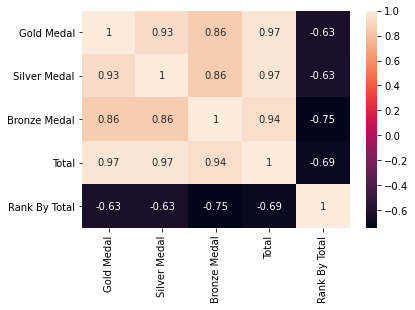

In [71]:
sns.heatmap(df.corr(), annot=True)

### Lineplot

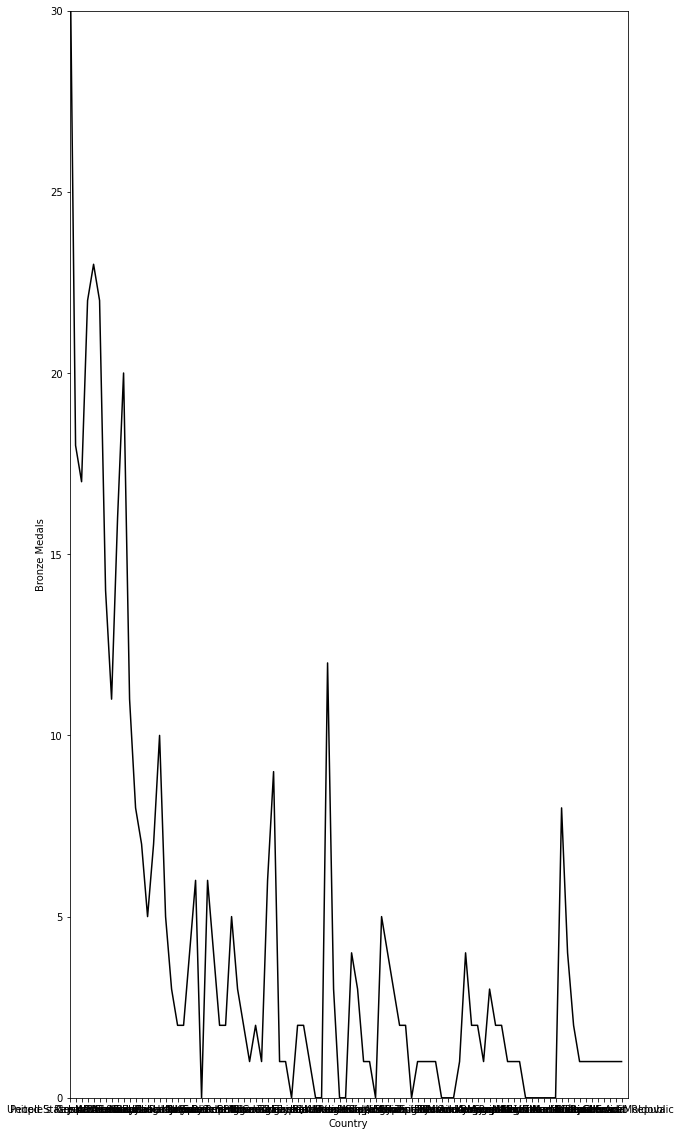

In [113]:
# Plotting with index along the x-axis
plt.figure(figsize=(10, 20))
plt.plot(df['Country'],df['Bronze Medal'],color="black")

plt.xlim(0, 93) # range for x-axis
plt.ylim(0, 30) # range for x-axis
plt.xlabel('Country')
plt.ylabel('Bronze Medals');


### Scatterplot

<AxesSubplot:xlabel='Gold Medal', ylabel='Total'>

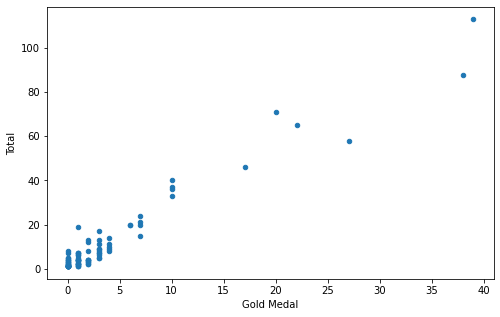

In [119]:
df.plot.scatter('Gold Medal', 'Total', figsize=(8, 5))

### Boxplot

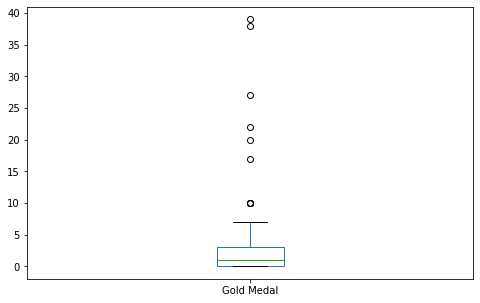

In [121]:
df['Gold Medal'].plot.box(figsize=(8, 5));

<AxesSubplot:>

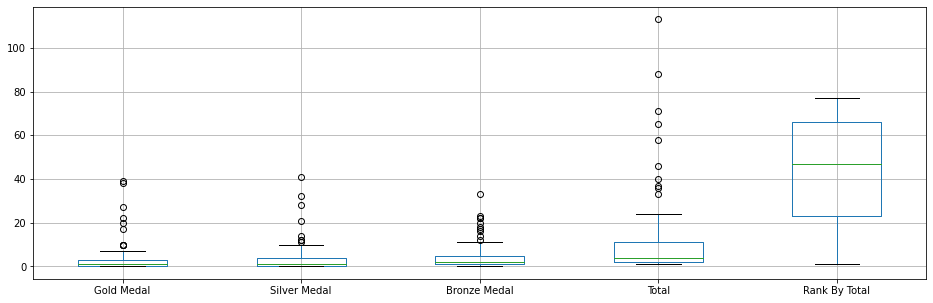

In [122]:
df.boxplot(figsize=(16, 5)) 

### Histogram

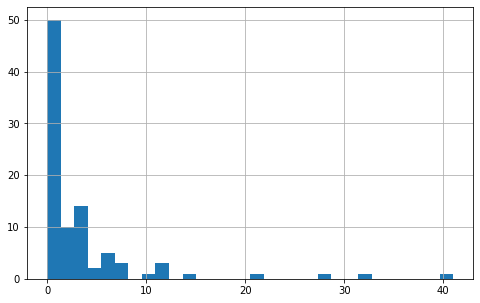

In [128]:
df['Silver Medal'].hist(bins=30, figsize=(8, 5));

### Barplot
The bar charts are used to visualize categorical data (nominal or ordinal values) and the height shows the value it represents

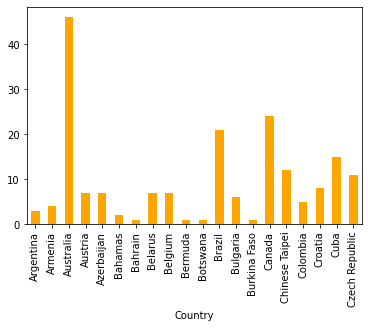

In [134]:
df_avg_medals = df.groupby('Country')['Total'].mean()
df_avg_medals[:20].plot.bar(color='orange');

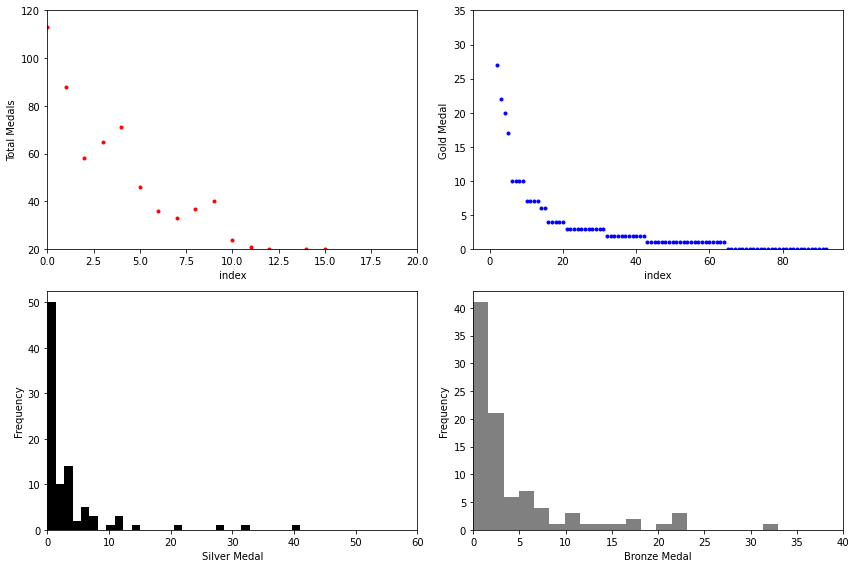

In [148]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# or fig, (ax1, ax2, ax3, ax4) = plt.subplots(2, 2, figsize=(12, 8))

# axes is the axes object(s). It can be a single object or an array of objects. 
# In this case, it is an array of dimension 2-by-2

df['Total'].plot(ax = axes[0][0], style='.', color='red') # top left
df['Gold Medal'].plot(ax = axes[0][1], style='.', color='blue') # top right

df['Silver Medal'].plot.hist(bins=30, ax = axes[1][0], color='black') # bottom left
df['Bronze Medal'].plot.hist(bins=20, ax = axes[1][1], color='gray') # bottom right

axes[0][0].set_xlabel('index')
axes[0][1].set_xlabel('index')
axes[1][0].set_xlabel('Silver Medal')
axes[1][1].set_xlabel('Bronze Medal')

axes[0][0].set_ylabel('Total Medals')
axes[0][1].set_ylabel('Gold Medal')

axes[0][0].set_ylim(20, 120)
axes[0][1].set_ylim(0, 35)
axes[0][0].set_xlim(0,20)
axes[1][0].set_xlim(0, 60)
axes[1][1].set_xlim(0, 40)

fig.tight_layout()